hr/>

# Emergency 911 Calls - Data Analysis
**[by Rishab Bandodkar](https://www.kaggle.com)**
<hr/>

### Table of Contents
* **1. [Introduction](#ch1)**
* **2. [Dataset](#ch2)**
    * 2.1 Imports
    * 2.2 Get the Data
    * 2.3 Analyze by Describing Data
* **3. [Creating New Features](#ch3)**
* **4. [Exploratory Data Analysis (EDA)](#ch4)**
* **5. [Heatmap](#ch7)**
* **6. [Clustermap](#ch8)**
* **7. [References](#ch9)**

<a id="ch1"></a>
# 1. Introduction 
<hr/>

One of the objectives of this project is to **show step-by-step how to analyze and visualize the dataset to better understand 911 calls and what originates them.** Moreover, we are going to explain most of the concepts used so that you understand why we are using them. 

If you have a question or feedback, do not hesitate to write and if you like this kernel,<b><font color='green'> please upvote! </font></b>

The following questions will be answered throughout the Kernel:
* ***Which features are available in the dataset?***
* ***How many rows and columns does the dataset have?***
* ***Which features are categorical?***
* ***Which features are numerical?***
* ***Which features contain blank, null or empty values?***
* ***What are the data types for various features?***
* ***How many zip codes does the dataset have?***
* ***What are the top 5 zip codes for 911 calls?***
* ***What are the top 5 townships (twp) for 911 calls?***
* ***How many unique title of emergency codes are there?***
* ***What is the most common Reason for a 911 call based off of this new column?***



<img width="1400" height="980" alt="Ambulance" title="Ambulance" fetchpriority="high" decoding="async" src="https://hips.hearstapps.com/pop.h-cdn.co/assets/17/26/1600x1600/square-1498656444-gettyimages-128628981.jpg?resize=640:*" sizes="auto" class="lqip lazyloaded css-uyz67a e1lki9i00">
<br>

<a id="ch2"></a>
# 2. Dataset
<hr/>

* This dataset contains emergency calls from Montgomery County, PA. 
* It includes calls from 2015 to 2020. 

***Montgomery County***

Montgomery County, locally also referred to as Montco, is a county located in the Commonwealth of Pennsylvania. As of the 2010 census, the population was 799,874, making it the third-most populous county in Pennsylvania, after Philadelphia and Allegheny Counties. The county seat is Norristown. Montgomery County is very diverse, ranging from farms and open land in Upper Hanover to densely populated rowhouse streets in Cheltenham.

***911 Calls***

Created by Congress in 2004 as the 911 Implementation and Coordination Office (ICO), the National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce.

***Feature Columns***
    
* **lat:** String variable, Latitude
* **lng:** String variable, Longitude
* **desc:** String variable, Description of the Emergency Call
* **zip:** String variable, ZIP Code
* **title:** String variable, Title of Emergency
* **timeStamp:** String variable, Date and time of the call, YYYY-MM-DD HH:MM:SS
* **twp:** String variable, Township
* **addr:** String variable, General Address
* **e:** String variable, Dummy variable, Index column (always 1)

## 2.1 Imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2.2 Get the Data
The Python Pandas packages helps us work with our datasets. We start by acquiring the datasets into Pandas DataFrames.

In [2]:
df = pd.read_csv('../input/montcoalert/911.csv')

## 2.3 Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

***Which features are available in the dataset?***

In [3]:
print(df.columns.values)

['lat' 'lng' 'desc' 'zip' 'title' 'timeStamp' 'twp' 'addr' 'e']


***How many rows and columns does the dataset have?***

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])

Rows     : 663522
Columns  : 9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


***Which features are categorical?***

* Categorical: desc, zipcode, title, twp, addr, e.

***Which features are numerical?***

* Continous: lat, lng.
* Discrete: timeStamp.

In [6]:
# preview the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Dropping column e
* As the column data dosent seem to have that relevance

In [7]:
df = df.drop('e',axis=1)

***What are the data types for various features?***

Three features are floats and five are objects. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


***How many zip codes does the dataset have?***

In [9]:
df['zip'].nunique()

204

***What are the top 5 zip codes for 911 calls?***

In [10]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

***How many unique title of emergency codes are there?***

In [12]:
df['title'].nunique()

148

<a id="ch3"></a>
# 3. Creating new features
<hr/>

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [13]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [14]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

# 4. Exploratory Data Analysis
** Now use seaborn to create a countplot of 911 calls by Reason. **
* And we see that the EMS is the most occured reason *

<AxesSubplot:xlabel='Reason', ylabel='count'>

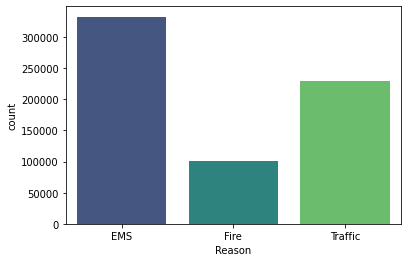

In [15]:
sns.countplot(x='Reason',data=df,palette='viridis')

** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **
** we observed that the time imformation was provided was a string data type and had to be converted to date time**

In [16]:
type(df['timeStamp'].iloc[0])

str

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [18]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Data we have of the day of week is in the form of integer ranging from 0 to 6 and it is better to define in terms of week days so we initialize a dictionary and map the results with it using the map() function **

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

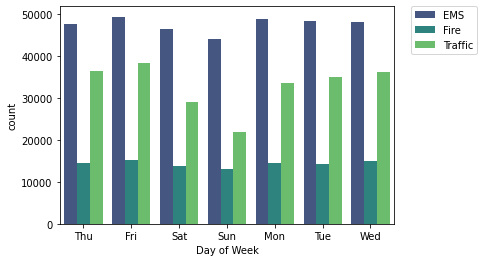

In [21]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Now do the same for Month:**

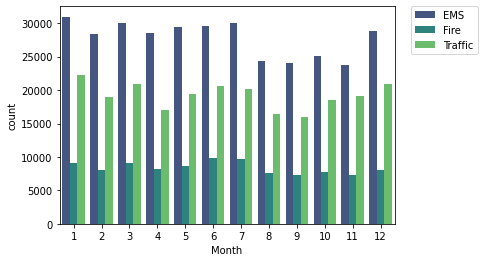

In [22]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation for better idea of how 911 calls frequencies vary over time. Use the head() method on this returned DataFrame. **

In [23]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Day of Week
Month,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

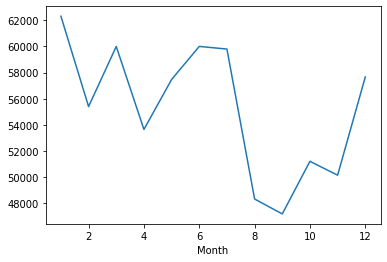

In [24]:
# Could be any column
byMonth['twp'].plot()

** Now we can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

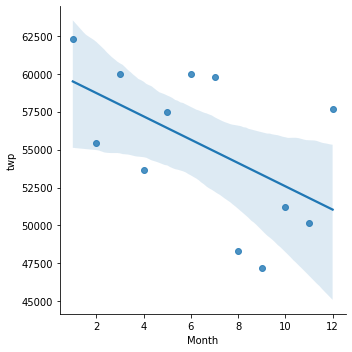

In [25]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [26]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

** Now we groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

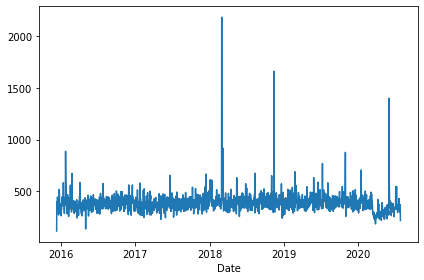

In [27]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

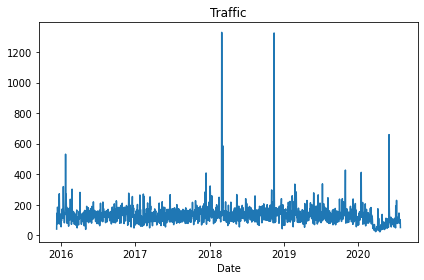

In [28]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

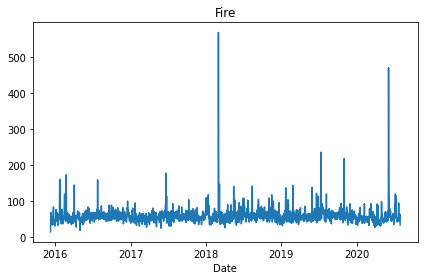

In [29]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

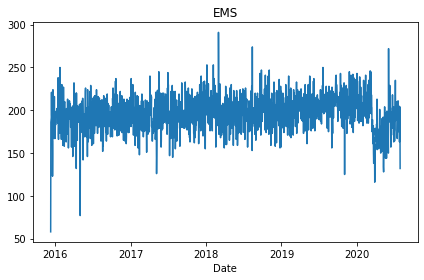

In [30]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

# 5. Heat Maps
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week **

In [31]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

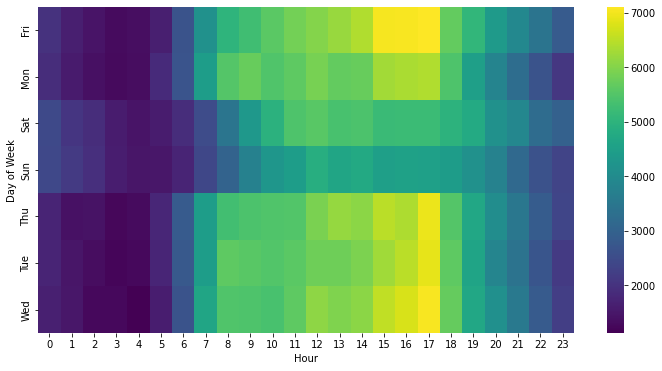

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

# 6. ClusterMap 
** Now create a clustermap using this DataFrame. **

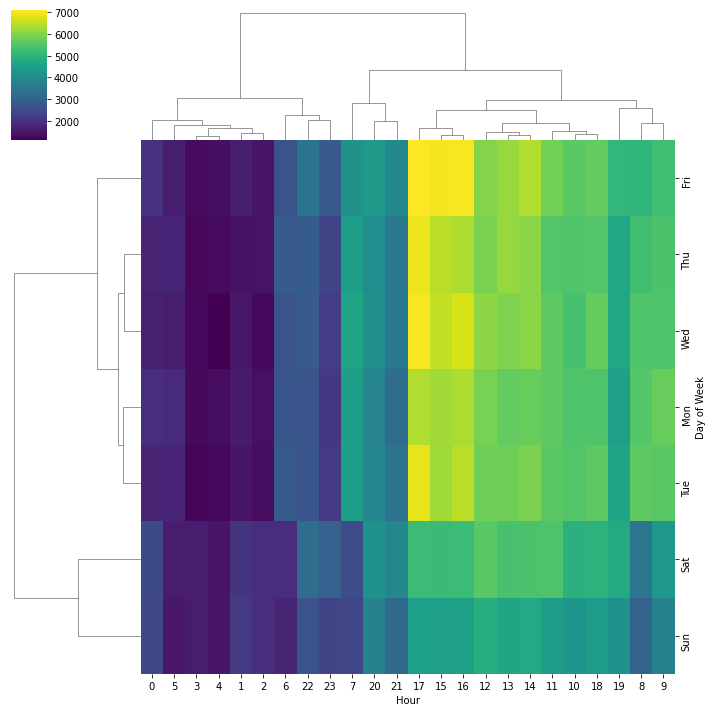

In [33]:
sns.clustermap(dayHour,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [34]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

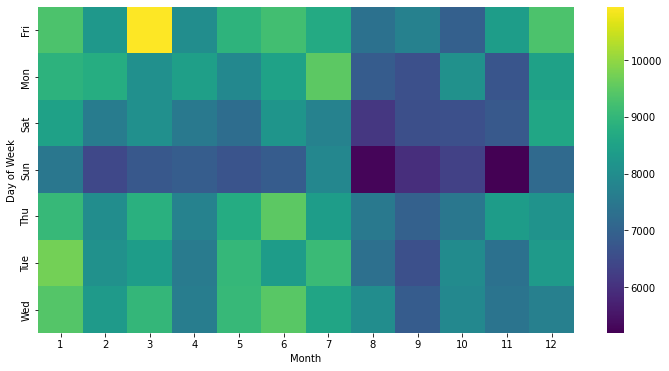

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

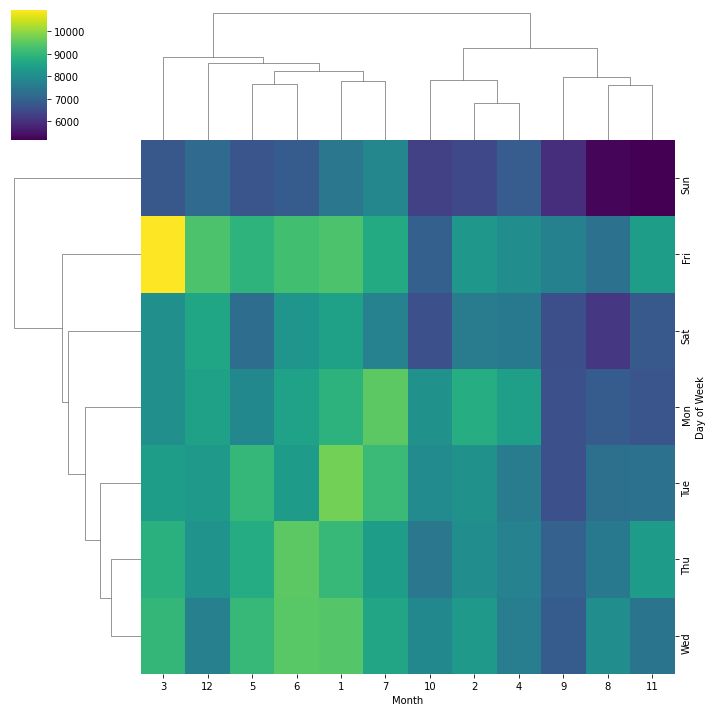

In [36]:
sns.clustermap(dayMonth,cmap='viridis')